# LINEAR REGRESSION #
Linear regression  is simply $ perdicted_y = \theta_0 + \theta_1*x_1 + \theta_2*x_2 + ... + \theta_3*x_3 $ (eq 1-1)

n = number of features

$ x_i $ = the $i^{th}$ feature

$\theta$ = the $j^{th}$ model parameter + the bias to also known as b or, $\theta_0$

Vector form:

$\hat{y} = h_\theta(x) = \theta*x$ eq(1-2)

$\theta$ = Parameter vector with $theta_0$ or b being in there

$x$ = the feature vector contain $x_0, x_1, ..., x_n$

$\theta*x$ = eq(1-1)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93839661],
       [2.95523311]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("X_new_b:\n",X_new_b)
print("y_predict:\n", y_predict)

X_new_b:
 [[1. 0.]
 [1. 2.]]
y_predict:
 [[3.93839661]
 [9.84886282]]


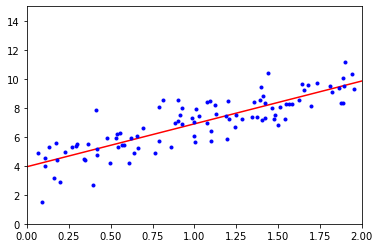

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.93839661] [[2.95523311]]


array([[3.93839661],
       [9.84886282]])

In [6]:

theta_best_svd, residual,  rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.93839661],
       [2.95523311]])

SVD = Singular Value Decomposition

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[3.93839661],
       [2.95523311]])

# Batch Gradient Decent #

Finds a minimum by using the MSE accross the whole training data, time does not scale well with number of features

$\triangledown_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$

each step of descent represented as:

$next_\theta= \theta - \eta\triangledown_\theta MSE(\theta)$

In [8]:
learn_rate = 0.1 #also called eta
n_interations = 100
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learn_rate * gradients

theta

array([[3.92646201],
       [2.9654255 ]])

# Stochastic Gradien Descent #
grabs a sing

In [9]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_scedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        learn_rate = learning_scedule(epoch*m+i)
        theta = theta - learn_rate*gradients

theta

array([[3.95942567],
       [3.00092619]])

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty="None", eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty='None')

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92207786]), array([2.94878683]))

# Polynomial Regression #
using linear regressions with powers we can use it make linear regressions

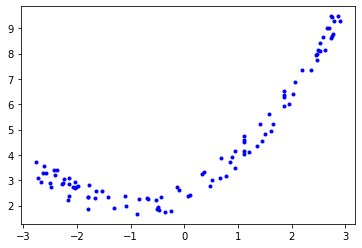

In [12]:
m = 100
X = 6*np.random.rand(m,1) - 3
X = X[X[:,0].argsort()]
y = 0.5 * X**2 + X + 2 +np.random.rand(m,1)
plt.plot(X,y,'b.')
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly  = poly_features.fit_transform(X)
print(X[0])
X_poly[0]


[-2.77013166]


array([-2.77013166,  7.67362944])

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.5169187]), array([[0.97900551, 0.49920472]]))

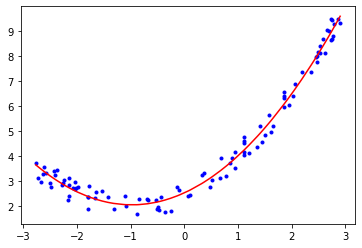

In [15]:
plt.plot(X,y,"b.")
plt.plot(X, lin_reg.predict(X_poly), "r-")
plt.show()

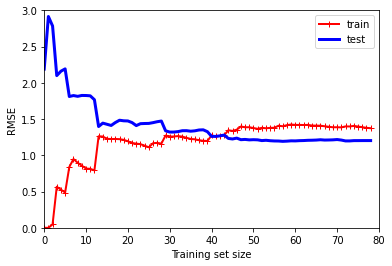

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    train_errors, test_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")
    plt.xlim(0,80)
    plt.ylim(0,3)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

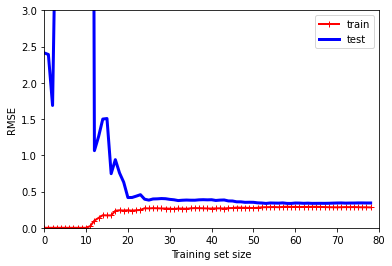

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X,y)

# Ridge Regression #

closed form solution:

$\hat{\theta}=(X^TX+\alpha A)^{-1}X^T y$

uses l2 norm to regularize

In [18]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.84127724]])

In [19]:
# With SGD

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.81216486])

# Lasso Regression #

cost function = $J(\theta)= MSE(\theta) + \alpha \sum_{i=1}^{n}|\theta|$

can do feature selection to get rid of useless features (i.e. $\theta_i=0$)

uses l1 norm

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.80641849])

# Elastic Net #

uses both Ridge Regression and Lassor Regression as a middle ground

uses variable $r$ as a ratio variable between the two regressions

closed form:

$J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2$

$r=0$ leads to Ridge Regression

$r=1$ leads to Lasso Regression

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.80588913])